In [ ]:
import pandas as pd
import io
import matplotlib
import scipy
from scipy import stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np

In [ ]:
data = pd.read_csv('all_predictions.csv')
data


,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,HR,O2Sat,SBP,MAP,Age,HospAdmTime,ICULOS,SepsisLabel,patient,Gender_0,Gender_1,RForest,GBcf,logReg
0,0,365227,365227.0,78.0,98.0,94.0,68.00,24.11,-0.02,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,206374,206374.0,70.0,97.5,126.5,87.50,61.08,-6.42,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,2,308975,308975.0,95.0,100.0,135.0,81.00,67.96,-65.21,2.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0
3,3,374832,374832.0,119.0,98.0,97.0,61.67,71.60,-179.78,2.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0
4,4,347184,347184.0,66.0,97.0,116.0,78.00,25.94,-0.03,2.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,82849,82849.0,77.0,100.0,153.0,109.00,50.00,-0.02,35.0,1.0,9995.0,0.0,1.0,1.0,1.0,1.0
9996,9996,363630,363630.0,66.0,98.0,115.0,79.00,59.00,-14.19,3.0,0.0,9996.0,1.0,0.0,0.0,0.0,0.0
9997,9997,10942,10942.0,70.0,95.0,121.0,98.00,58.00,-2.88,2.0,0.0,9997.0,0.0,1.0,0.0,0.0,0.0
9998,9998,100550,100550.0,99.0,95.0,94.0,65.00,78.00,-1.89,2.0,0.0,9998.0,1.0,0.0,0.0,0.0,0.0


# FIRST MODEL - RANDOM FOREST

> Indented block



In [ ]:
len(data[data['RForest']==1])/len(data)

0.0616

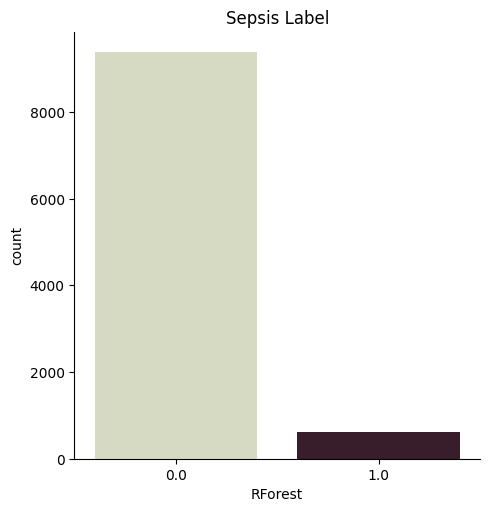

In [ ]:
sns.catplot(x="RForest", kind="count", palette="ch:.50", data=data).set(title='Sepsis Label')

Text(0.5, 1.0, 'HR Histogram')

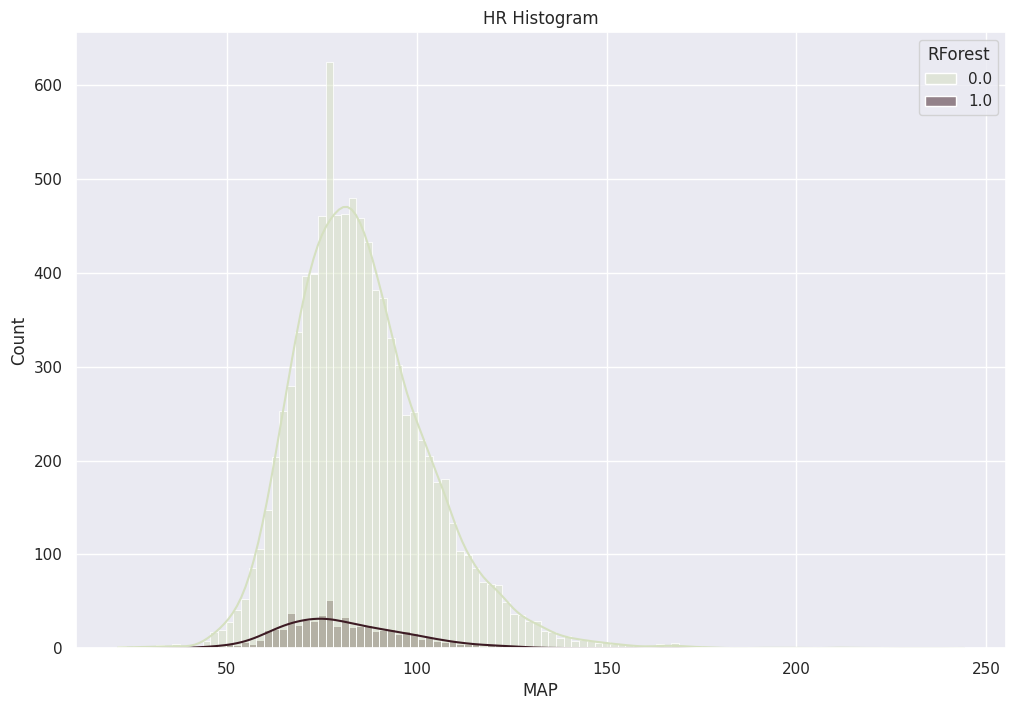

In [ ]:
sns.histplot(data=data, x="MAP" ,kde=True, hue="RForest",  palette="ch:.60").set_title('HR Histogram')


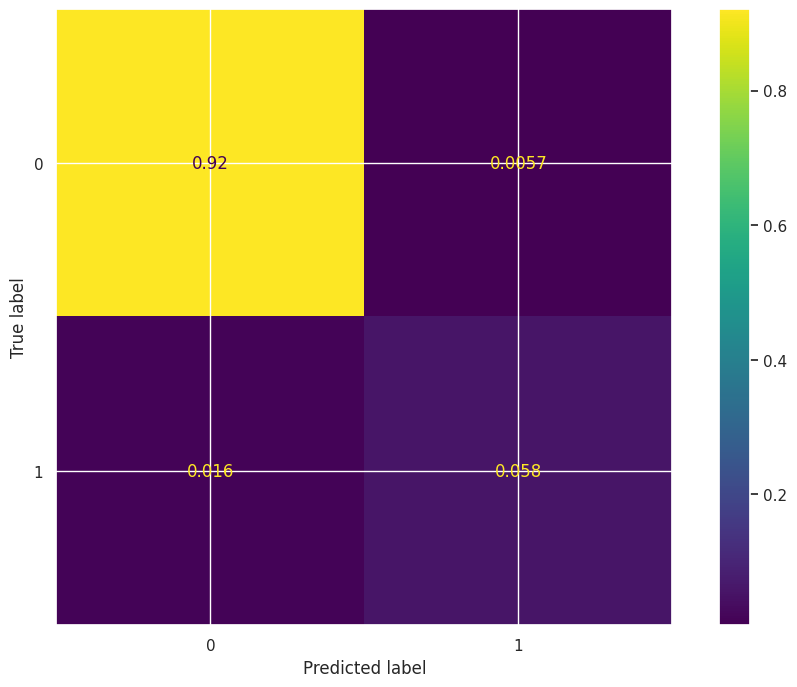

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

young = data[data['Age']<50]
older = data[data['Age']>=50]
cm = confusion_matrix(young['SepsisLabel'], young['RForest'], normalize='all')
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()

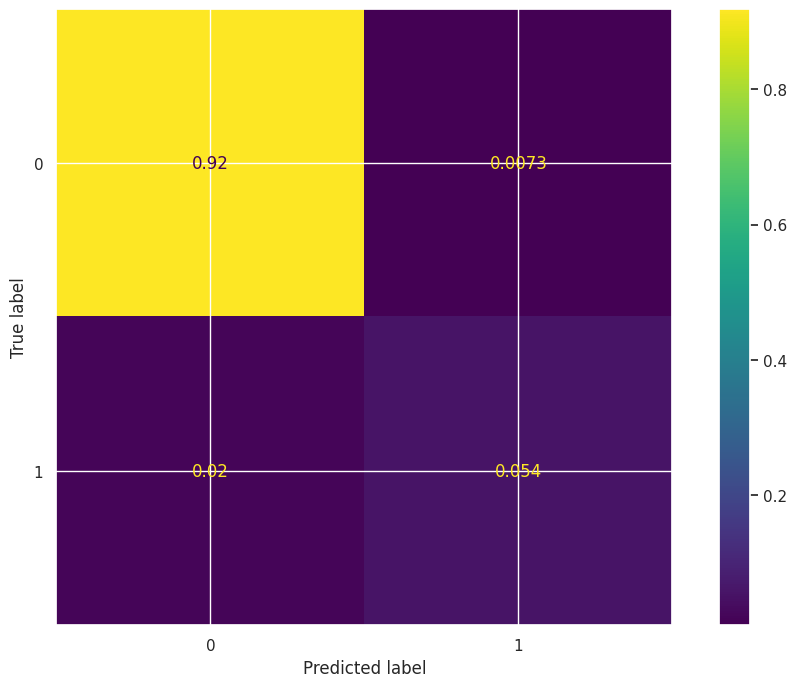

In [ ]:
cm = confusion_matrix(older['SepsisLabel'], older['RForest'], normalize='all')
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()

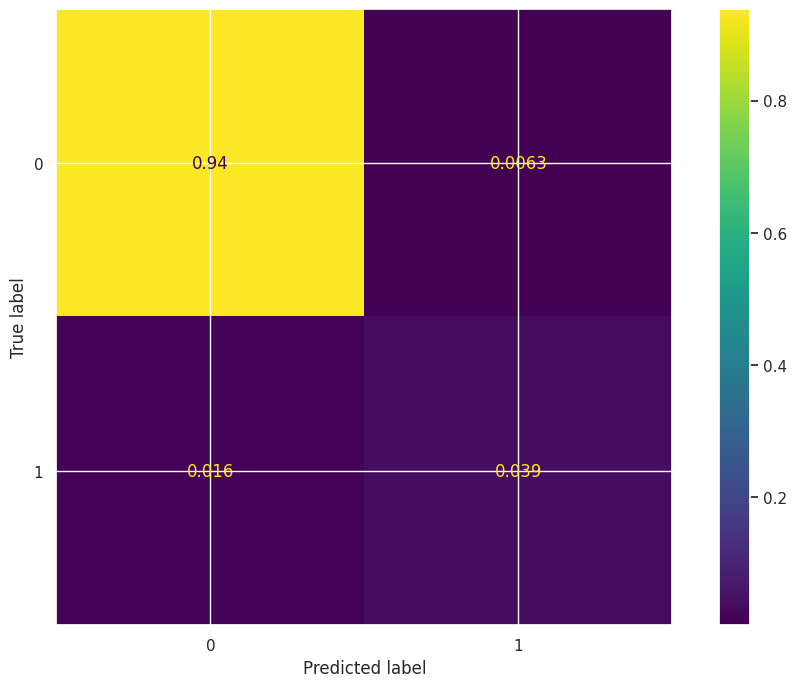

In [ ]:
low_HR = data[data['HR']<np.mean(data['HR'])]
high_HR = data[data['HR']>=np.mean(data['HR'])]
cm = confusion_matrix(low_HR['SepsisLabel'], low_HR['RForest'], normalize='all')
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()

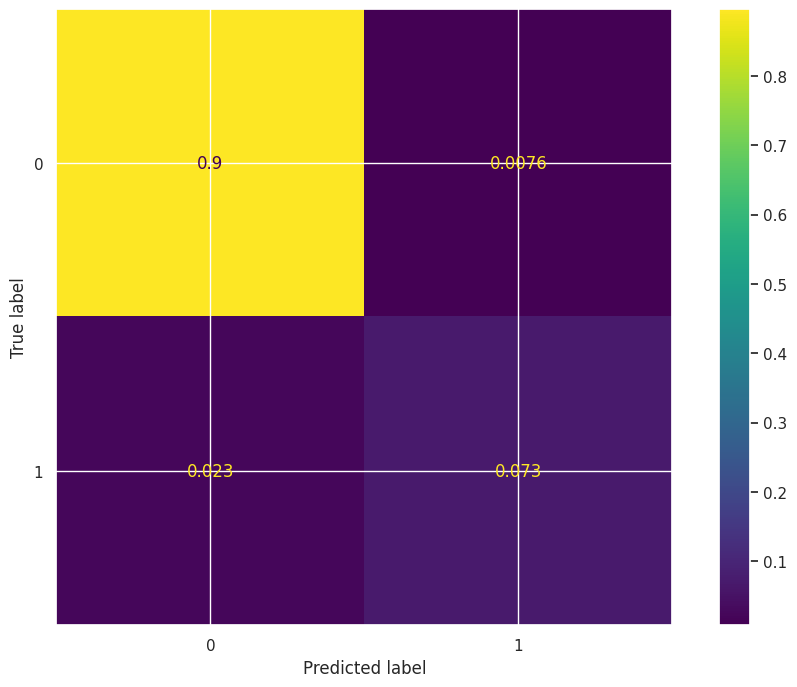

In [ ]:
cm = confusion_matrix(high_HR['SepsisLabel'], high_HR['RForest'], normalize='all')
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(data['SepsisLabel'], data['RForest'], target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      9259
           1       0.89      0.74      0.81       741

    accuracy                           0.97     10000
   macro avg       0.93      0.87      0.90     10000
weighted avg       0.97      0.97      0.97     10000



# SECOND MODEL - GB

> Indented block



In [ ]:

len(data[data['GBcf']==1])/len(data)

0.0631

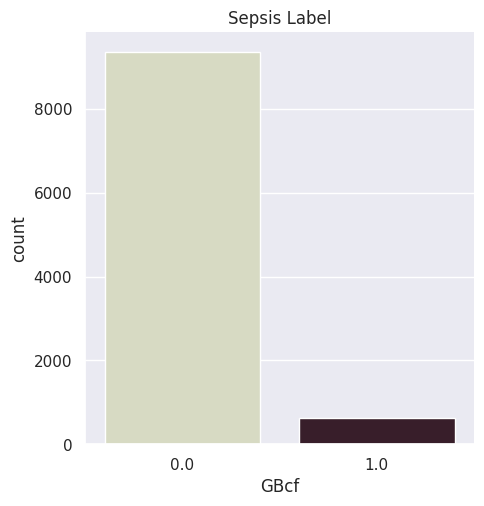

In [ ]:
sns.catplot(x="GBcf", kind="count", palette="ch:.50", data=data).set(title='Sepsis Label')

Text(0.5, 1.0, 'HR Histogram')

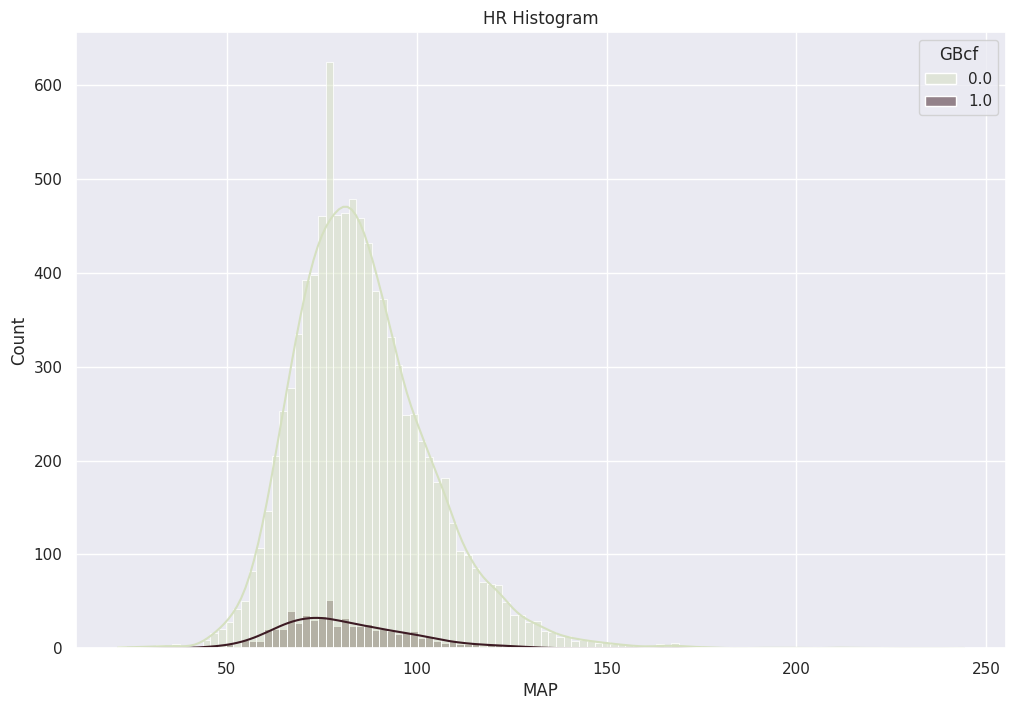

In [ ]:
sns.histplot(data=data, x="MAP" ,kde=True, hue="GBcf",  palette="ch:.60").set_title('HR Histogram')


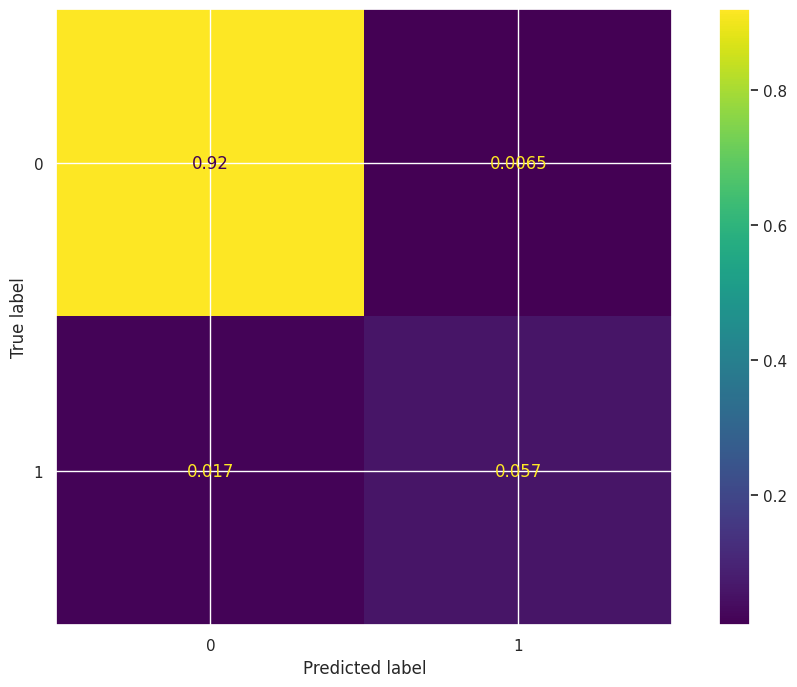

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

young = data[data['Age']<50]
older = data[data['Age']>=50]
cm = confusion_matrix(young['SepsisLabel'], young['GBcf'], normalize='all')
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()

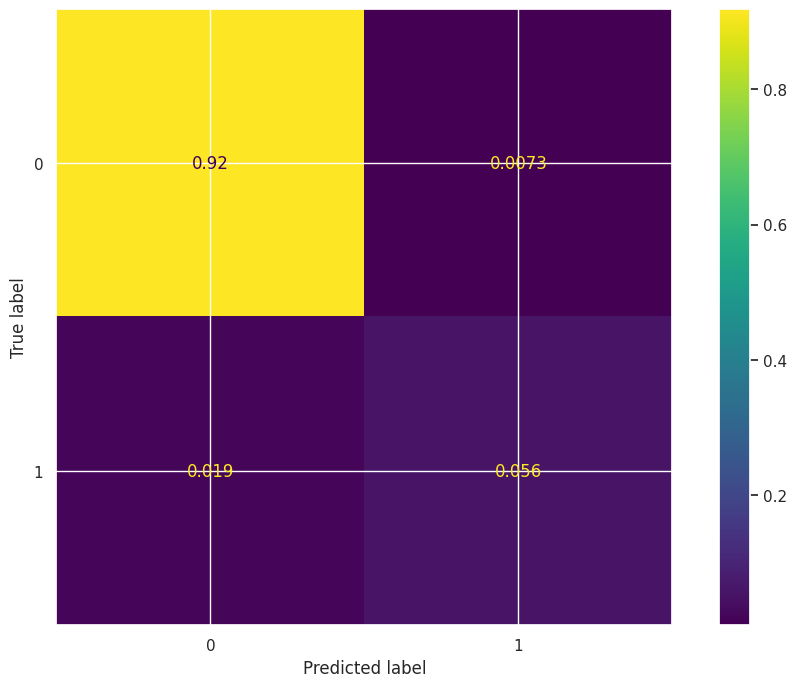

In [ ]:
cm = confusion_matrix(older['SepsisLabel'], older['GBcf'], normalize='all')
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()

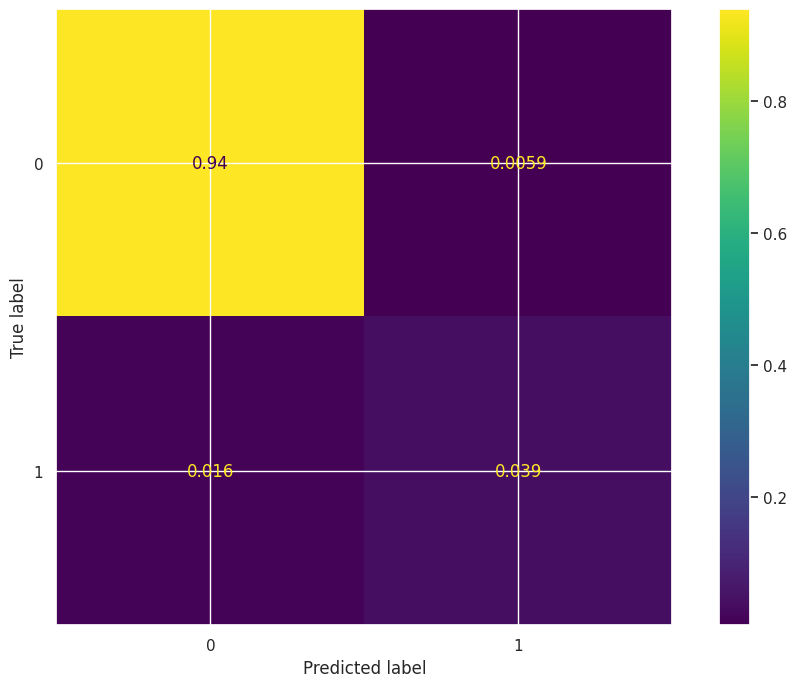

In [ ]:
low_HR = data[data['HR']<np.mean(data['HR'])]
high_HR = data[data['HR']>=np.mean(data['HR'])]
cm = confusion_matrix(low_HR['SepsisLabel'], low_HR['GBcf'], normalize='all')
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()

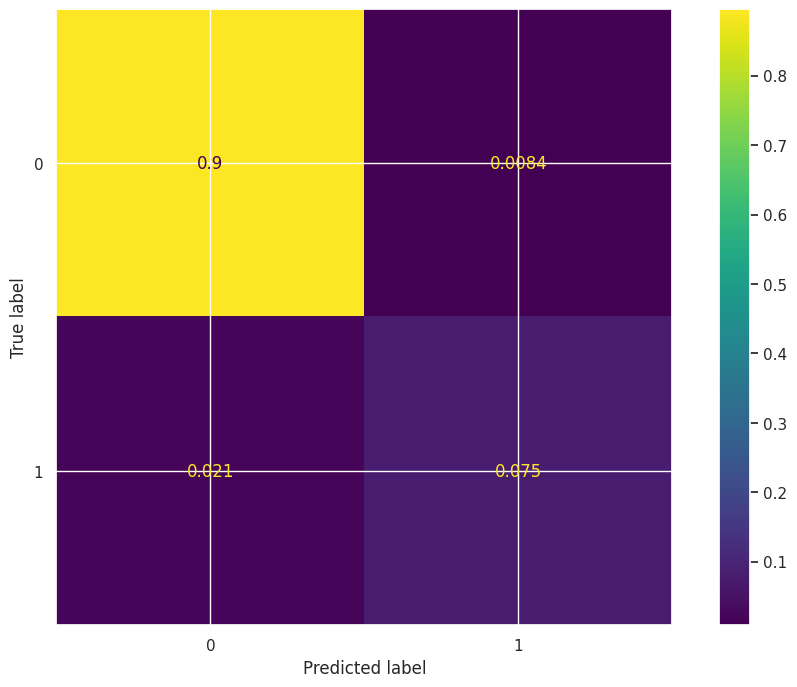

In [ ]:
cm = confusion_matrix(high_HR['SepsisLabel'], high_HR['GBcf'], normalize='all')
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(data['SepsisLabel'], data['GBcf'], target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      9259
           1       0.89      0.76      0.82       741

    accuracy                           0.97     10000
   macro avg       0.93      0.87      0.90     10000
weighted avg       0.97      0.97      0.97     10000



# THIRD MODEL - LOGISTIC REGRESSION

> Indented block



In [ ]:
len(data[data['logReg']==1])/len(data)

0.0476

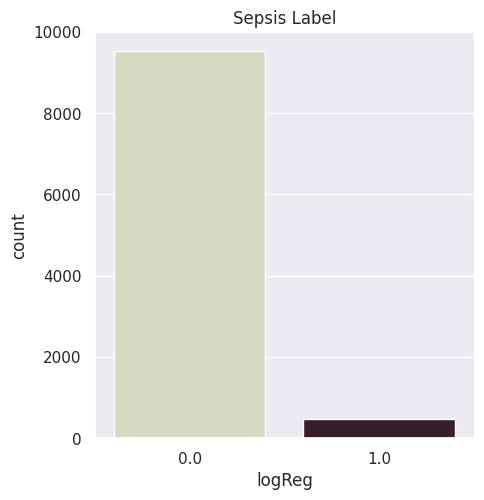

In [ ]:
sns.catplot(x="logReg", kind="count", palette="ch:.50", data=data).set(title='Sepsis Label')

Text(0.5, 1.0, 'HR Histogram')

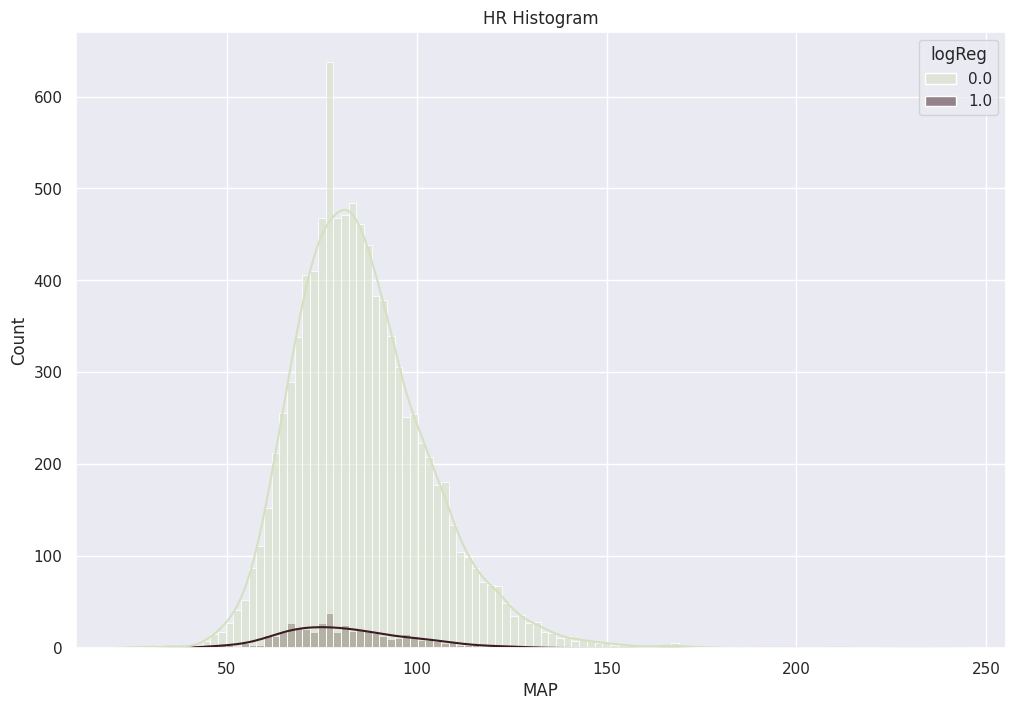

In [ ]:
sns.histplot(data=data, x="MAP" ,kde=True, hue="logReg",  palette="ch:.60").set_title('HR Histogram')


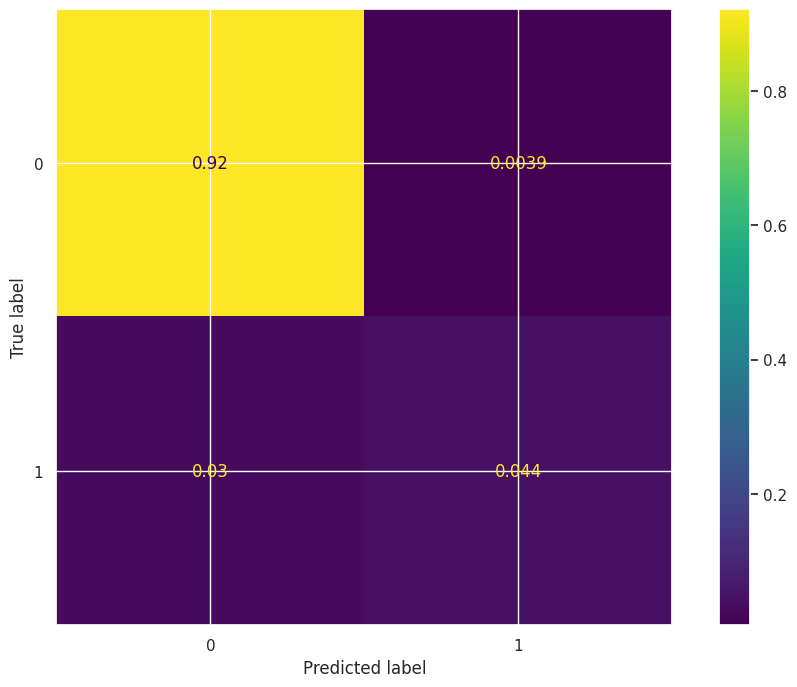

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

young = data[data['Age']<50]
older = data[data['Age']>=50]
cm = confusion_matrix(young['SepsisLabel'], young['logReg'], normalize='all')
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()

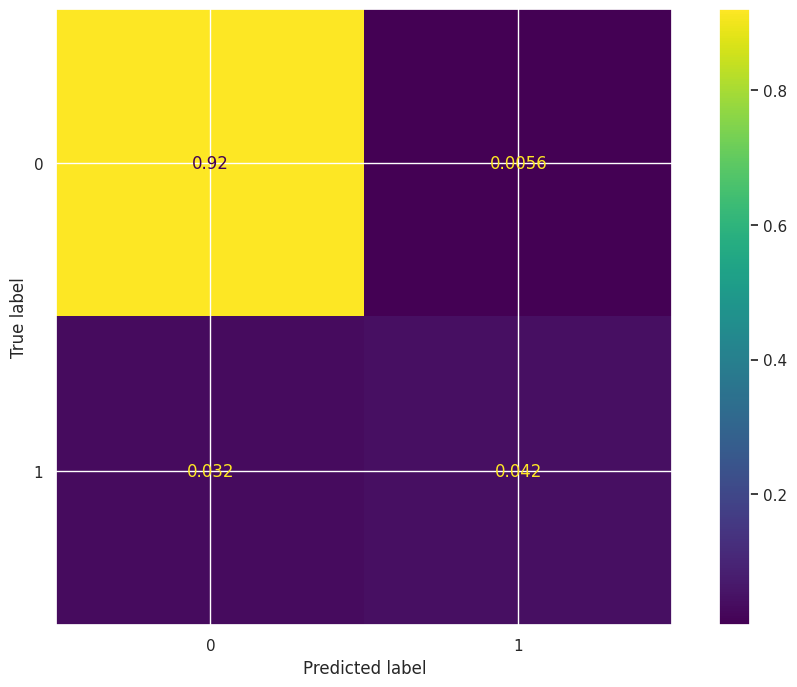

In [ ]:
cm = confusion_matrix(older['SepsisLabel'], older['logReg'], normalize='all')
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()

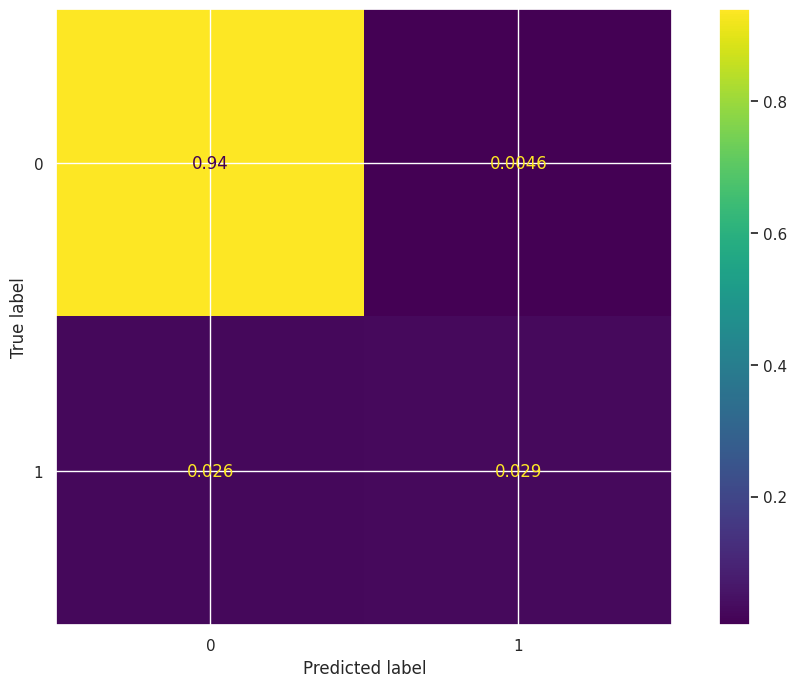

In [ ]:
low_HR = data[data['HR']<np.mean(data['HR'])]
high_HR = data[data['HR']>=np.mean(data['HR'])]
cm = confusion_matrix(low_HR['SepsisLabel'], low_HR['logReg'], normalize='all')
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()

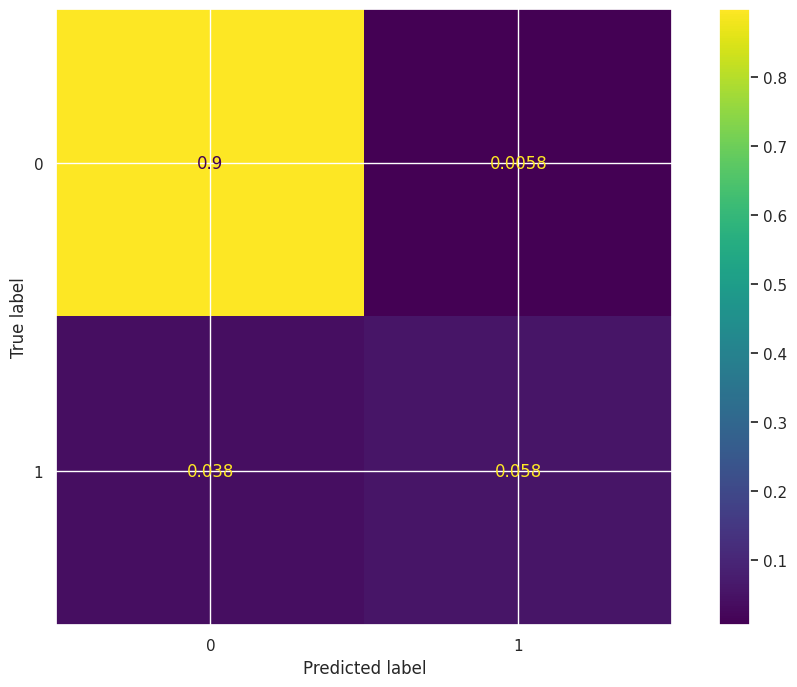

In [ ]:
cm = confusion_matrix(high_HR['SepsisLabel'], high_HR['logReg'], normalize='all')
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(data['SepsisLabel'], data['logReg'], target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      9259
           1       0.89      0.57      0.70       741

    accuracy                           0.96     10000
   macro avg       0.93      0.78      0.84     10000
weighted avg       0.96      0.96      0.96     10000

